In [139]:
import yfinance as yf
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

In [140]:
eminispx = yf.Ticker("ES=F")
emininq = yf.Ticker("NQ=F")

In [141]:
hist_spx = eminispx.history(period="max")
hist_nq = emininq.history(period="max")

In [142]:
hist_spx = hist_spx.drop('Dividends',1)
hist_nq = hist_nq.drop('Dividends',1)

In [143]:
hist_spx = hist_spx.drop('Volume',1)
hist_nq = hist_nq.drop('Volume',1)

In [144]:
spx_px = hist_spx.drop('Stock Splits',1)
nq_px = hist_nq.drop('Stock Splits',1)

In [145]:
spx_px.rename(columns={'Open': 'open_spx', 'High': 'high_spx', 'Low': 'low_spx', 'Close': 'close_spx'}, inplace=True)
nq_px.rename(columns={'Open': 'open_nq', 'High': 'high_nq', 'Low': 'low_nq', 'Close': 'close_nq'}, inplace=True)

In [146]:
price_data = pd.concat([spx_px, nq_px], axis=1)
price_data

,open_spx,high_spx,low_spx,close_spx,open_nq,high_nq,low_nq,close_nq
Date,,,,,,,,
2000-09-18,1485.25,1489.75,1462.25,1467.50,3721.00,3785.50,3602.000000,3653.50
2000-09-19,1467.00,1482.75,1466.75,1478.50,3658.50,3817.00,3656.000000,3804.00
2000-09-20,1478.75,1480.50,1450.25,1469.50,3801.50,3874.00,3715.500000,3853.00
2000-09-21,1470.25,1474.00,1455.50,1469.50,3852.00,3874.00,3744.000000,3765.00
2000-09-22,1454.75,1471.00,1436.75,1468.50,3673.00,3780.00,3615.000000,3776.00
...,...,...,...,...,...,...,...,...
2021-10-28,4548.75,4589.75,4545.25,4587.50,15595.00,15777.00,15591.750000,15764.75
2021-10-29,4577.00,4603.50,4559.25,4597.00,15679.75,15864.75,15595.500000,15838.50
2021-11-01,4608.00,4619.50,4586.50,4605.75,15885.25,15914.75,15768.500000,15894.25


In [151]:
trans = MinMaxScaler()
prices.isnull().any().sum()

0

In [152]:
px = trans.fit_transform(price_data)
prices = DataFrame(px)

prices.rename(columns={0: 'open_spx', 1: 'high_spx', 2: 'low_spx', 3: 'close_spx',
                            4: 'open_nq', 5: 'high_nq', 6: 'low_nq', 7: 'close_nq'}, inplace=True)


In [153]:
prices

,open_spx,high_spx,low_spx,close_spx,open_nq,high_nq,low_nq,close_nq
0,0.205372,0.202174,0.201595,0.200507,0.192174,0.195159,0.185234,0.187692
1,0.200747,0.200394,0.202733,0.203293,0.188048,0.197238,0.188801,0.197624
2,0.203725,0.199822,0.198557,0.201013,0.197488,0.201000,0.192731,0.200858
3,0.201571,0.198169,0.199886,0.201013,0.200822,0.201000,0.194613,0.195050
4,0.197643,0.197406,0.195140,0.200760,0.189005,0.194796,0.186093,0.195776
...,...,...,...,...,...,...,...,...
5302,0.981629,0.990527,0.981903,0.990880,0.976053,0.986586,0.977144,0.986982
5303,0.988788,0.994024,0.985447,0.993287,0.981647,0.992377,0.977391,0.991850
5304,0.996643,0.998093,0.992344,0.995503,0.995214,0.995677,0.988818,0.995529
5305,0.996072,1.000000,0.994052,1.000000,0.995593,1.000000,0.994168,0.999951


<AxesSubplot:>

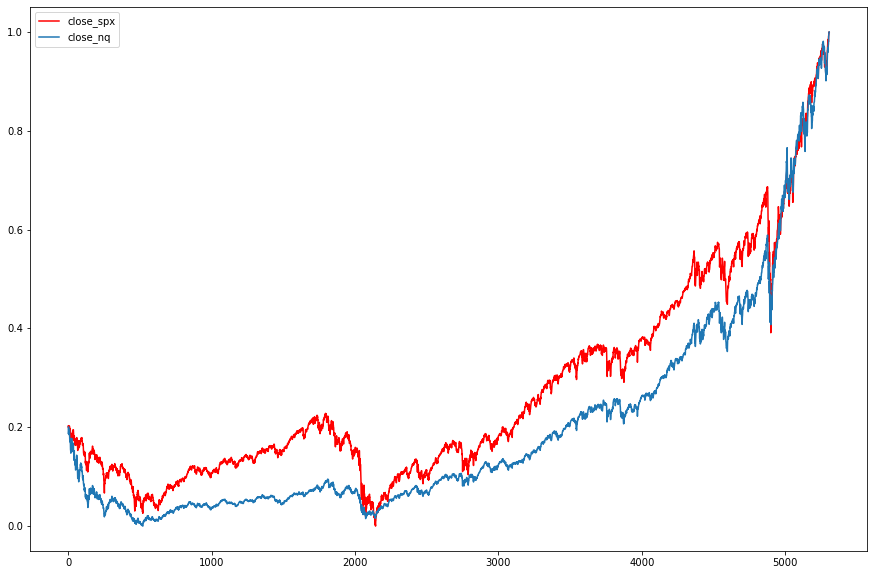

In [154]:
prices['close_spx'].plot(figsize=(15,10),color='r',legend=True)
prices['close_nq'].plot(figsize=(15,10),legend=True)

In [155]:
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')